# 数据挖掘第三次报告
## 数据集：alzheimer
## 学号：32220221155 姓名：桂梦婷

### 1 数据分析
#### 1.1 数据分析目的
该数据集的主题是一系列关于疾病的调查，其中地理位置、受调查人的个人情况也囊括在内，我认为其最终目的为在给定环境和人员基本情况下，预测他们的患病概率，以对他们的健康生活做出指导。首先需要先观察数据。
#### 1.2 数据摘要
该数据集为csv格式，可以非常方便利用csv相关的函数对表头进行读取，以获取数据集包含的信息。

In [31]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
# dataPath = "G:\\gmt\\data_mining\\homework2\\dataset"
dataPath = "C:\\Users\\gui\\Desktop\\homework2\\dataset"

In [32]:
with open(dataPath+"\\alzheimer\\Alzheimer Disease and Healthy Aging Data In US.csv","r",encoding="utf-8") as f:
    reader = csv.reader(f)
    header = next(reader)
    print("共有{}列属性，分别是：".format(len(header)))
    print(header)

    df = pd.read_csv(dataPath+"\\alzheimer\\Alzheimer Disease and Healthy Aging Data In US.csv",header = 0)

共有29列属性，分别是：
['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource', 'Class', 'Topic', 'Question', 'Data_Value_Unit', 'DataValueTypeID', 'Data_Value_Type', 'Data_Value', 'Data_Value_Alt', 'Low_Confidence_Limit', 'High_Confidence_Limit', 'Sample_Size', 'StratificationCategory1', 'Stratification1', 'StratificationCategory2', 'Stratification2', 'Geolocation', 'ClassID', 'TopicID', 'QuestionID', 'LocationID', 'StratificationCategoryID1', 'StratificationID1', 'StratificationCategoryID2', 'StratificationID2']


g:\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3012: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


可以看到数据集包含非常多列，观察它们，我们可以粗略地对相关的数据列进行分类：
1. 数据收集时间(2)：YearStart,YearEnd
2. 数据收集位置(4)：LocationAbbr,LocationDesc(前两项分别是地理位置的简写和称);Geolocation;LocationID(它们都代表了具体的位置和对应id)
3. 疾病类型(6)：Class,ClassID;Topic,TopicID;Question,QuestionID(研究的健康问题、主题、具体研究问题)
4. 疾病评估数值(7)：Data_Value_Unit,DataValueTypeID,Data_Value_Type(有关数据的形式);Data_Value,Data_Value_Alt(有关数值);Low_Confidence_Limit,High_Confidence_Limit(数据的置信度)
5. 研究对象属性(8)：StratificationCategoryID1,StratificationCategory1,StratificationID1,Stratification1(属性1和对应值);
               StratificationCategoryID2,StratificationCategory2,StratificationID2,Stratification2(属性2和对应值)
6. 数据来源(1):DataSource
7. 其他(1)：Sample_Size
接下来分别对各类数据的基本情况进行分析。

##### 1.2.1 数据收集时间、收集位置、数据来源
首先对数据收集时间、收集位置、数据来源各自的数据分布进行可视化分析。
（1） 数据收集时间

In [33]:
allLength = df["YearStart"].describe().count()
df["YearStart"] = df["YearStart"].values.astype(int)
print(df["YearStart"].describe())
print("YearStart缺失值个数:{}".format(df["YearStart"].isnull().sum()))

count    214462.000000
mean       2017.378477
std           1.779822
min        2015.000000
25%        2016.000000
50%        2017.000000
75%        2019.000000
max        2020.000000
Name: YearStart, dtype: float64
YearStart缺失值个数:0


In [34]:
df["YearEnd"] = df["YearEnd"].values.astype(int)
print(df["YearEnd"].describe())
print("YearEnd缺失值个数:{}".format(df["YearEnd"].isnull().sum()))

count    214462.000000
mean       2017.634000
std           1.778926
min        2015.000000
25%        2016.000000
50%        2018.000000
75%        2019.000000
max        2020.000000
Name: YearEnd, dtype: float64
YearEnd缺失值个数:0


In [35]:
year = {}
for i in range(0,len(df["YearStart"])):
    if df["YearStart"][i] in year:
        if df["YearEnd"][i] in year[df["YearStart"][i]]:
            year[df["YearStart"][i]][df["YearEnd"][i]] += 1
        else:
            year[df["YearStart"][i]][df["YearEnd"][i]] = 1
    else:
        year[df["YearStart"][i]] = {}
        if df["YearEnd"][i] in year[df["YearStart"][i]]:
            year[df["YearStart"][i]][df["YearEnd"][i]] += 1
        else:
            year[df["YearStart"][i]][df["YearEnd"][i]] = 1
# print(year)

In [36]:
year_order = [(k,year[k]) for k in sorted(year.keys())]

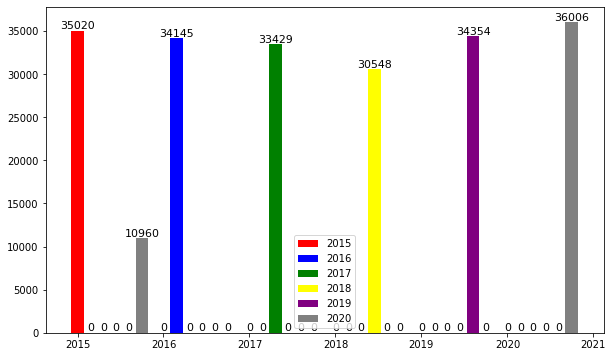

In [37]:
width = 0.15
posMove = 0
color = {2015:"red",2016:"blue",2017:"green",2018:"yellow",2019:"purple",2020:"grey"}
x = []
y = [[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0]]
for key,item in year_order:
    x.append(key)
    for endYear,num in item.items():
        y[endYear-2015][key-2015] = num
# print(y)
plt.figure(figsize=(10,6))
for data in range(0,len(y)):
    realYear = data+2015
    plt.bar([i+posMove*width for i in x],y[data],width=0.15,color=color[data+2015],label=str(realYear))
    posMove += 1
    for a,b in zip(x,y[data]):
        plt.text(a+posMove*width-0.15, b, '%.0f' % b, ha='center', va= 'bottom',fontsize=11)

plt.legend()
plt.show()

以开始时间开始为横坐标，探究调查持续时间可以发现，除2015年以外，其余疾病调查均为1年内数据；而2015年开始的调查中，有10960条持续了5年（至2020年终止）。且可以发现，这两列数据并无缺失值和错误值（即开始时间大于结束时间）。

（2）数据收集位置
首先分析该数据是否存在缺失值和错误值，该数据可能出现的错误值情况为ID、位置简写和位置全称不对应的情况。

In [38]:
# 数据值是否有缺失,总数据条数为214462条
# LocationAbbr,LocationDesc;Geolocation;LocationID
print("LocationAbbr缺失值个数:{}".format(df["LocationAbbr"].isnull().sum()))
print("LocationDesc缺失值个数:{}".format(df["LocationDesc"].isnull().sum()))
print("Geolocation缺失值个数:{}".format(df["Geolocation"].isnull().sum()))
print("LocationID缺失值个数:{}".format(df["LocationID"].isnull().sum()))

LocationAbbr缺失值个数:0
LocationDesc缺失值个数:0
Geolocation缺失值个数:23049
LocationID缺失值个数:0


观察结果，发现地理位置除Geolocation均无缺失值，可以发现，LocationID和Geolocation一一对应，可以利用其关系填补缺失值;如果存在同LocationID，且同行Geolocation非空，则填补；否则不填补。

In [39]:
for line in range(0,len(df)):
    if pd.isna(df["Geolocation"][line]):
        lineID = df["LocationID"][line]
        fillData = df[(df["LocationID"] == lineID) & (pd.notna(df["Geolocation"]))]
        if len(fillData) != 0:
            df.loc[(df["LocationID"] == df["LocationID"][line]) & (df["Geolocation"].isnull())].fillna(fillData["Geolocation"][0],inplace = True)

然后统计调查位置分布和ID与位置的对应关系，分析数据是否存在错误值，以下代码运行后，可以发现全称和简写、具体地理位置坐标和ID均为一一对应，无错误;接下来判断具体地理坐标ID是否与地区一一对应，均为一一对应。

In [40]:
print("填补后Geolocation缺失值个数:{}".format(df["Geolocation"].isnull().sum()))

填补后Geolocation缺失值个数:23049


In [41]:
locDic = {}
locGeoDic = {}
locIDDescDic = {}
# 记录错误数据行数
# locDic = {"位置全称":"简写"}
wrongData = []
for line in range(0,214462):
    locDesc = df["LocationDesc"][line]
    locAbbr = df["LocationAbbr"][line]
    locID = df["LocationID"][line]
    locGeo = df["Geolocation"][line]

    if locDesc in locDic:
        if locAbbr != locDic[locDesc]:
            wrongData.append(line)
    else:
        locDic[locDesc] = locAbbr

    if locID in locGeoDic:
        if locGeo not in locGeoDic[locID]:
            locGeoDic[locID].append(locGeo)
            wrongData.append(line)
    else:
        locGeoDic[locID] = [locGeo]

    if locID in locIDDescDic:
        if locDesc not in locIDDescDic[locID]:
            locIDDescDic[locID].append(locDesc)
            wrongData.append(line)
    else:
        locIDDescDic[locID] = [locDesc]


print("地理位置错误对应的数量为：{}".format(len(wrongData)))
# print(locGeoDic)

地理位置错误对应的数量为：0


判断完是否有缺失值后，对调查案例的地区分布进行简单的分析。可以发现大部分区域均选取约3000人进行跟进调查，而Virgin Island跟踪调查人物较少。

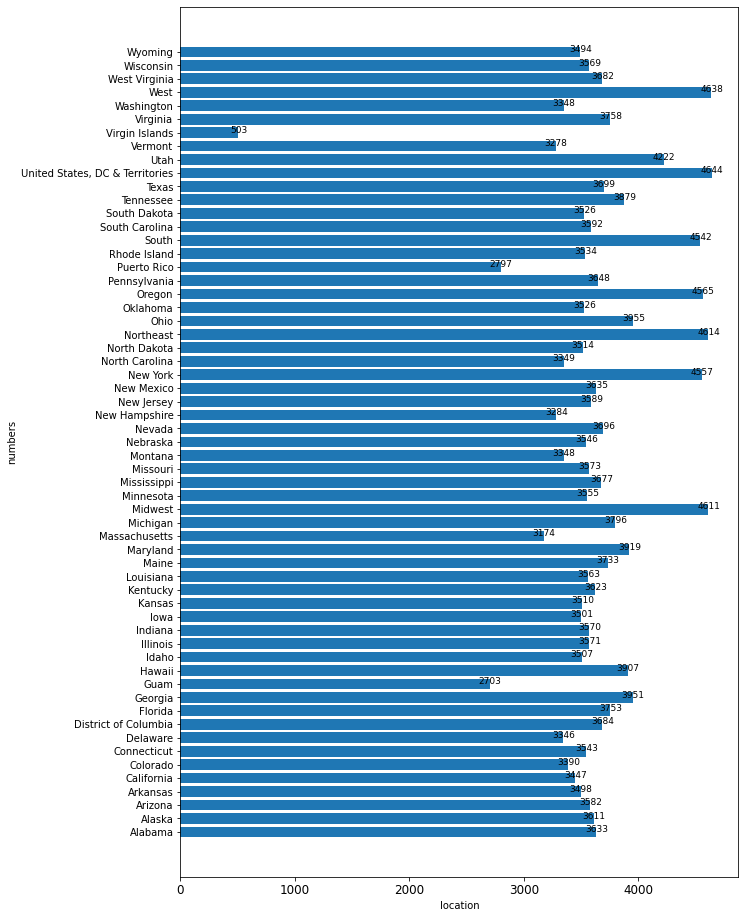

In [42]:
dicLoc = {}
for line in range(0, 214462):
    locDesc = df["LocationDesc"][line].strip("\n")
    if locDesc in dicLoc:
        dicLoc[locDesc] += 1
    else:
        dicLoc[locDesc] = 1
dicLoc_order = {}
for j in sorted(dicLoc.keys()):
    dicLoc_order[j] = dicLoc[j]
# print(dicLoc_order)
plt.figure(figsize=(10,16))
plt.xlabel("location")

plt.xticks(fontsize=12)
plt.ylabel("numbers")
x = list(dicLoc_order.keys())
y = list(dicLoc_order.values())
# print(x)
for a, b in zip(x,y):
     plt.text(b+4,a, '%.0f' % b, horizontalalignment='center', fontsize=9)
plt.barh(x,y,height=0.8)
plt.show()

（3） 疾病类型(6)：Class,ClassID;Topic,TopicID;Question,QuestionID(研究的健康问题、主题、具体研究问题)
疾病类型的处理逻辑和地理位置的处理逻辑一致，不过多赘述，结果发现仍无错误对应关系

In [43]:
disClassDic = {}
disTopicDic = {}
disQuesDic = {}
# 记录错误数据行数
wrongData = []
for line in range(0,214462):
    disClass = df["Class"][line]
    disClassID = df["ClassID"][line]
    disTopic = df["Topic"][line]
    disTopicID = df["TopicID"][line]
    disQues = df["Question"][line]
    disQuesID = df["QuestionID"][line]

    if disClassID in disClassDic:
        if disClass not in disClassDic[disClassID]:
            disClassDic[disClassID].append(disClass)
            wrongData.append(line)
    else:
        disClassDic[disClassID] = [disClass]

    if disTopicID in disTopicDic:
        if disTopic not in disTopicDic[disTopicID]:
            disTopicDic[disTopicID].append(disTopic)
            wrongData.append(line)
    else:
        disTopicDic[disTopicID] = [disTopic]

    if disQuesID in disQuesDic:
        if disQues not in disQuesDic[disQuesID]:
            disQuesDic[disQuesID].append(disQues)
            wrongData.append(line)
    else:
        disQuesDic[disQuesID] = [disQues]


print("调查类型错误对应的数量为：{}".format(len(wrongData)))

调查类型错误对应的数量为：0


接下来将对研究课题数量进行一定的分析。分别统计研究大类中不同主题的数量，以及研究不同主题研究的不同问题的方向数量，并绘制柱状图后，可以发现问题与主题一一对应，而不同大类中存在着许多的主题，其分布大致平均。可以推测出调查方式为将研究主题映射成一个问题，对该问题的评估即可代表研究主题的调研结果。

In [44]:
dicClassTopic = {}
dicTopicQues = {}
for line in range(0,214462):
    disClass = df["Class"][line]
    disTopic = df["Topic"][line]
    disQuesID = df["QuestionID"][line]
    if disClass in dicClassTopic:
        if disTopic in dicClassTopic[disClass]:
            dicClassTopic[disClass][disTopic] += 1
        else:
            dicClassTopic[disClass][disTopic] = 1
    else:
        dicClassTopic[disClass] = {}
        dicClassTopic[disClass][disTopic] = 1

    if disTopic in dicTopicQues:
        if disQuesID in dicTopicQues[disTopic]:
            dicTopicQues[disTopic][disQuesID] += 1
        else:
            dicTopicQues[disTopic][disQuesID] = 1
    else:
        dicTopicQues[disTopic] = {}
        dicTopicQues[disTopic][disQuesID] = 1

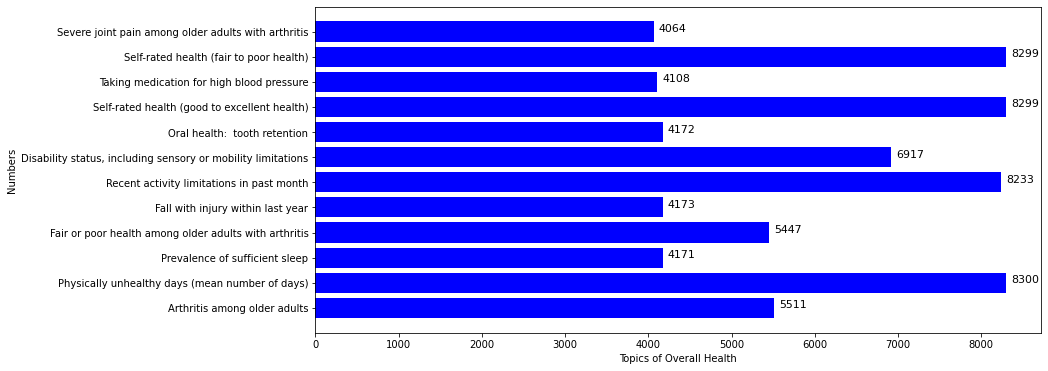

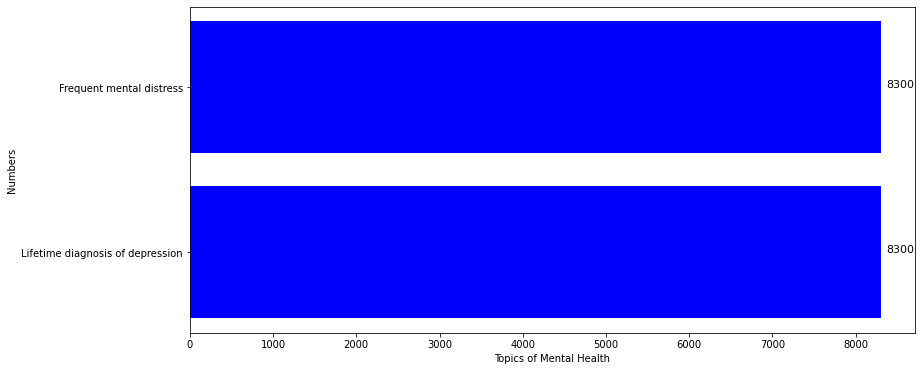

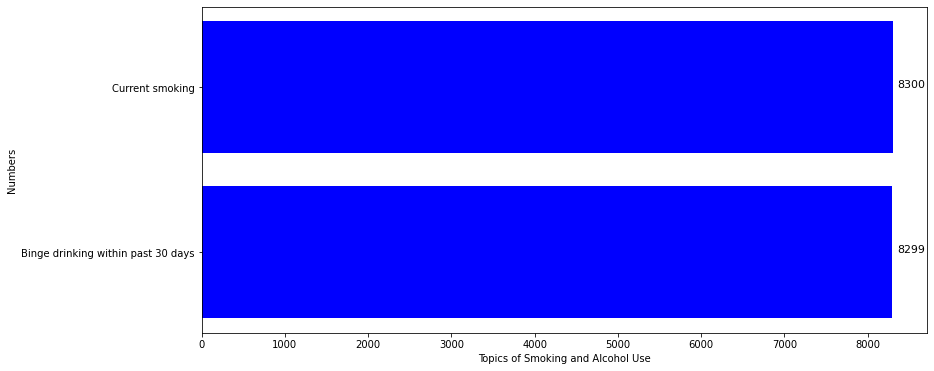

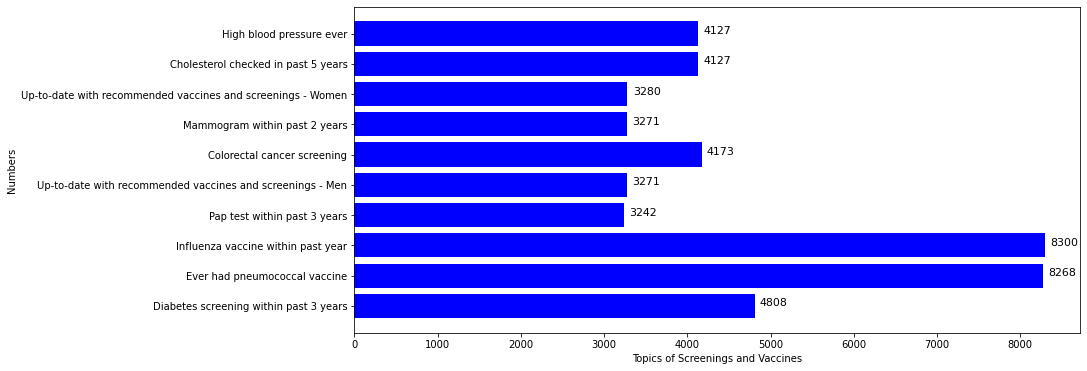

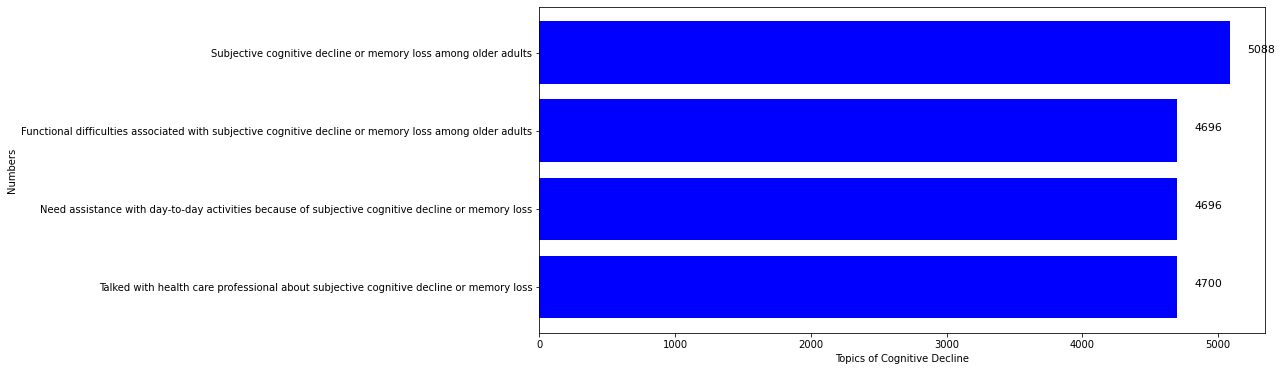

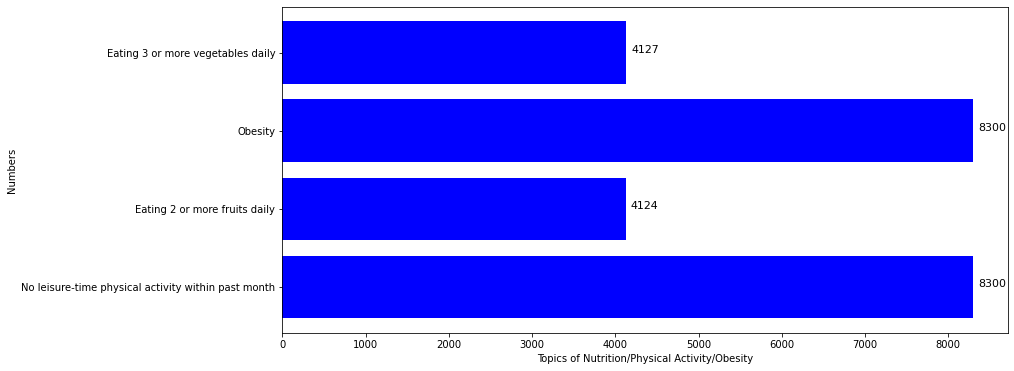

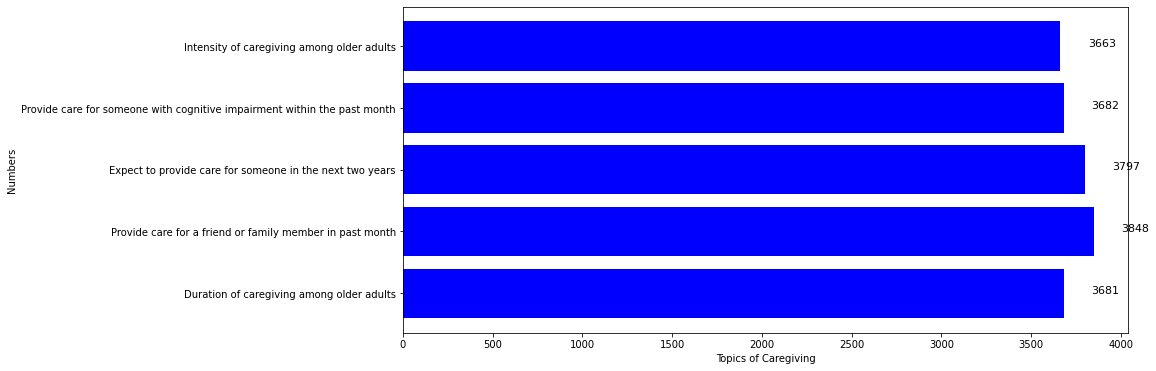

In [45]:
width = 0.15
for key in dicClassTopic.keys():
    plt.figure(figsize=(13,6))
    # plt.xticks(rotation=-20)
    plt.xlabel("Topics of {}".format(key))
    plt.ylabel("Numbers")
    for a,b in zip(dicClassTopic[key].keys(),dicClassTopic[key].values()):
        plt.text(b+230, a,'%.0f' % b, ha='center',fontsize=11)
    plt.barh(list(dicClassTopic[key].keys()), dicClassTopic[key].values(),color='b',height=0.8)
    plt.show()

<BarContainer object of 12 artists>

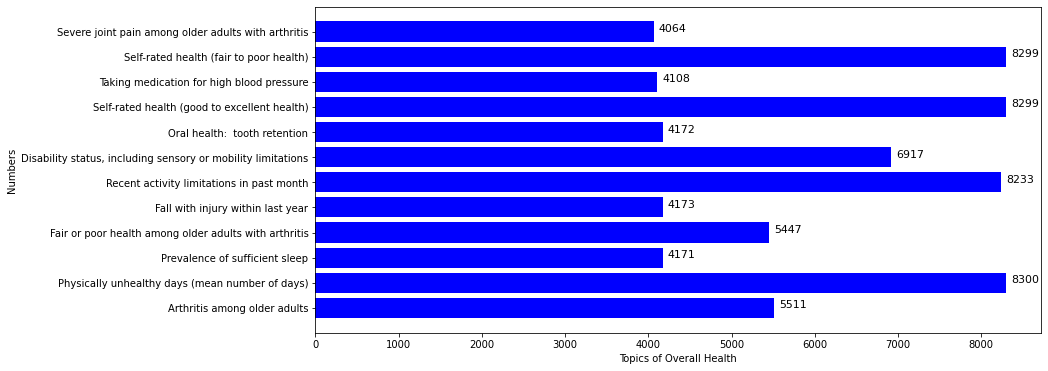

In [46]:
width = 0.15
plt.figure(figsize=(13,6))
# plt.xticks(rotation=-20)
plt.xlabel("Topics of Overall Health")
plt.ylabel("Numbers")
for a,b in zip(dicClassTopic["Overall Health"].keys(),dicClassTopic["Overall Health"].values()):
    plt.text(b+230, a,'%.0f' % b, ha='center',fontsize=11)
plt.barh(list(dicClassTopic["Overall Health"].keys()), dicClassTopic["Overall Health"].values(),color='b')

（4）疾病评估数值(7)：
Data_Value_Unit,DataValueTypeID,Data_Value_Type(有关数据的形式)
疾病评估形式等处理逻辑如上所示，同样发现无缺失和错误对应值。
Data_Value,Data_Value_Alt(有关数值);Low_Confidence_Limit,High_Confidence_Limit(数据的置信度)
而观察原始数据，发现有关数字的数值有明显缺失，统计分析其缺失属性所属课题和地区，以为接下来的数据缺失处理打下基础。

In [47]:
dfDataValue = pd.DataFrame([df["Data_Value"],df["Data_Value_Alt"],df["Low_Confidence_Limit"],df["High_Confidence_Limit"]])

In [48]:
missDataValue = []
for line in range(0,len(df["Data_Value"])):
    if not pd.notnull(dfDataValue[line]["Data_Value"]) or not pd.notnull(dfDataValue[line]["Low_Confidence_Limit"]):
        missDataValue.append(line)
# print(missDataValue)
print("缺失属性值个数为:{}，占全部数据的{}".format(len(missDataValue),len(missDataValue)/214462))

缺失属性值个数为:69990，占全部数据的0.3263515214816611


发现属性缺失值约有32%，此处需要建立模型拟合，从而填补空缺值。
对于离群点的处理，需要先绘制盒图，并采用五点法观察其特征,此处分析参见2.3小节。

（5）研究对象属性
StratificationCategoryID1,StratificationCategory1,StratificationID1,Stratification1(属性1和对应值)
StratificationCategoryID2,StratificationCategory2,StratificationID2,Stratification2(属性2和对应值)
首先初步观察数据可以得知，属性1和属性2均为调查对象属性，即使有缺失值也无法采用模型预测（调查对象并不符合一定的原则标准，性别和种族无法通过患病率预测），因此对于单列缺失值的处理方式为简单填充Unknown，若存在数据2个属性均缺失，需要综合该数据其他缺失值进行进一步评估和处理。

In [49]:
dicStr = {}
missStratification = [[],[]]
# dicStr = {“cateID":{"name":,"attr":{"ID":值}}}
for line in range(0,214462):
    strCate1 = df["StratificationCategory1"][line]
    strCateID1 = df["StratificationCategoryID1"][line]
    str1 = df["Stratification1"][line]
    strID1 = df["StratificationID1"][line]
    strCate2 = df["StratificationCategory2"][line]
    strCateID2 = df["StratificationCategoryID2"][line]
    str2 = df["Stratification2"][line]
    strID2 = df["StratificationID2"][line]

    if pd.notnull(strCate1):
        if strCateID1 in dicStr:
            if strID1 not in dicStr[strCateID1]["attr"]:
                dicStr[strCateID1]["attr"][strID1] = str1
            elif str1 != dicStr[strCateID1]["attr"][strID1]:
                missStratification.append(line)
        else:
            dicStr[strCateID1] = {}
            dicStr[strCateID1]["name"] = strCate1
            dicStr[strCateID1]["attr"] = {}
            dicStr[strCateID1]["attr"][strID1] = str1
    else:
        missStratification[0].append(line)

    if pd.notnull(strCate2):
        if strCateID2 in dicStr:
            if strID2 not in dicStr[strCateID2]["attr"]:
                dicStr[strCateID2]["attr"][strID2] = str2
            elif str2 != dicStr[strCateID2]["attr"][strID2]:
                missStratification.append(line)
        else:
            dicStr[strCateID2] = {}
            dicStr[strCateID2]["name"] = strCate2
            dicStr[strCateID2]["attr"] = {}
            dicStr[strCateID2]["attr"][strID2] = str2
    else:
        missStratification[1].append(line)

In [50]:
# print(dicStr)
# print(len(missStratification[0]))
# print(len(missStratification[1])/214462)

可以发现属性2有27669条缺失值，约占全部数据条数的13%左右，对于这些缺失值暂时不做处理。

（6）数据来源和其他
仅剩的DataSource和Sample_Size放到一起进行分析

In [51]:
missData = [[],[]]
dicOther = {"Datasource":[],"Sample_Size":[]}
for line in range(0,214462):
    if pd.notnull(df["Datasource"][line]):
        if df["Datasource"][line] not in dicOther["Datasource"]:
            dicOther["Datasource"].append(df["Datasource"][line])
    else:
        missData[0].append(line)

In [52]:
print(dicOther)
print(len(missData[0]))
print(len(missData[1]))

{'Datasource': ['BRFSS'], 'Sample_Size': []}
0
0


可以发现Datasource来源单一，且Sample_Size列为数据完全缺失的列，因此删除Sample_Size列。

#### 1.3 数据总结
在1.2对数据情况进行分析后，可以发现部分数据存在缺失：
① 患病率和置信区间（4）：缺失约32%左右，需建立模型进行拟合，填补缺失值
② 调查对象属性2（2）：缺失约13%左右，无法采取有效方式填补缺失值（由于性别和种族无法被有效预测），使用Unknown填补所有缺失值
③ 数据样本尺寸（Sample_Size）：缺失值为100%，删除该列
④ 具体坐标（GeoLocation）：缺失值约占11%左右，尝试寻找相似对象填补空值，若无相似对象，则不填补

### 2 数据缺失处理办法
#### 2.1 Sample_Size
该数据列100%缺失，该数据可能本应用于计算患病率或置信率等，用于记录跟踪人数，无法复原，予以去除。其具体方法为去除DataFrame中的Sample_Size列，可以看到已经成功地删除了Sample_Size列。

In [53]:
try:
    df = df.drop('Sample_Size',axis='columns')
except KeyError as error:
    print(error)
print(df.head(0))

Empty DataFrame
Columns: [YearStart, YearEnd, LocationAbbr, LocationDesc, Datasource, Class, Topic, Question, Data_Value_Unit, DataValueTypeID, Data_Value_Type, Data_Value, Data_Value_Alt, Low_Confidence_Limit, High_Confidence_Limit, StratificationCategory1, Stratification1, StratificationCategory2, Stratification2, Geolocation, ClassID, TopicID, QuestionID, LocationID, StratificationCategoryID1, StratificationID1, StratificationCategoryID2, StratificationID2]
Index: []

[0 rows x 28 columns]


#### 2.2 Stratification2,StratificationID2
简单采取StratificationCategory2填充Attrib,Stratification2填充Unknown方式填补缺失值。其缺失原因可能由于该数据记录缺失，或调查时未调查这些属性。对于空余部分，不能通过任何逻辑推理能够获取其真值，故填充Attribe/Unknown作为新值。

In [54]:
df['StratificationCategory2'].fillna("Attrib", inplace=True)
df['Stratification2'].fillna("Unknown", inplace=True)

#### 2.3 Data_Value,Data_Value_Alt(有关数值);Low_Confidence_Limit,High_Confidence_Limit(数据的置信度)
这些数据列缺失值较多，需要先观察缺失数据的属性。研究对象有年份、地区、年龄、第二属性（性别或种族或未知），需要先进行研究问题的筛选后，探究这些属性对研究问题的影响。对于每个特定问题，寻找同问题调查下，与缺失值所在行的其他属性相似的数据行，如存在多个，则采取多个数据行的均值替代缺失值。

In [55]:
# missDataValue列表中存放着缺失数据值的行编号
dicLossID = {}
for line in missDataValue:
    if df["QuestionID"][line] not in dicLossID:
        dicLossID[df["QuestionID"][line]] = [line]
    else:
        dicLossID[df["QuestionID"][line]].append(line)

In [56]:
print(dicLossID.keys())
for j in dicLossID.keys():
    print(len(dicLossID[j]))

dict_keys(['Q45', 'Q42', 'Q20', 'Q01', 'Q09', 'Q13', 'Q04', 'Q32', 'Q03', 'Q15', 'Q10', 'Q17', 'Q07', 'Q36', 'Q31', 'Q19', 'Q38', 'Q02', 'Q35', 'Q41', 'Q40', 'Q21', 'Q39', 'Q08', 'Q27', 'Q44', 'Q22', 'Q43', 'Q12', 'Q30', 'Q34', 'Q11', 'Q05', 'Q46', 'Q16', 'Q14', 'Q18', 'Q33', 'Q37'])
1881
1874
1442
1201
2592
2411
1312
2356
3010
1169
1423
2824
1101
1137
1918
1382
1202
1452
2738
1949
1557
3329
1226
2428
2710
1415
1102
1514
1331
1833
1095
1420
1586
1897
2339
1120
2283
2189
1242


对于不同问题而言，如果存在离群点，则将其全部处理为箱线图上限。

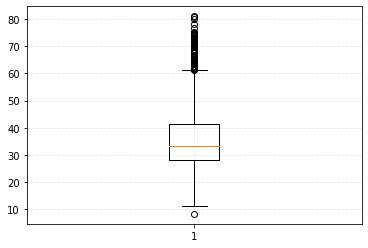

count    3566.000000
mean       35.683595
std        10.481523
min         8.200000
25%        28.225000
50%        33.200000
75%        41.400000
max        81.100000
Name: Data_Value, dtype: float64


C:\Users\gui\AppData\Local\Temp\ipykernel_11632\1185021264.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df["Data_Value"]>upLine]["Data_Value"] = upLine
C:\Users\gui\AppData\Local\Temp\ipykernel_11632\1185021264.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df["Data_Value"]<downLine]["Data_Value"] = downLine


In [57]:
for key in dicLossID.keys():
    quesID = key
    tempDf = df[(df.QuestionID == key)]
    # 获取了所有数据行之后，从中取出有数据值的数据，分别分析它们与年份、地区、年龄、第二属性的关系
    tempDfNotNull = tempDf[tempDf["Data_Value"].notna()]
    plt.boxplot(tempDfNotNull["Data_Value"])
    plt.grid(linestyle="--", alpha=0.3)
    plt.show()
    print(tempDfNotNull["Data_Value"].describe())

    iqr = tempDfNotNull["Data_Value"].describe()["75%"] - tempDfNotNull["Data_Value"].describe()["25%"]
    upLine = iqr*1.5 + tempDfNotNull["Data_Value"].describe()["75%"]
    downLine =  tempDfNotNull["Data_Value"].describe()["25%"] - iqr*1.5

    # TODO：值替换
    df[df["Data_Value"]>upLine]["Data_Value"] = upLine
    df[df["Data_Value"]<downLine]["Data_Value"] = downLine

    # 年份
    # 15-17-19-20-21
    # nowx = [tempDfNotNull[tempDfNotNull["YearStart"] == 2015]["Data_Value"],tempDfNotNull[tempDfNotNull["YearStart"] == 2016]["Data_Value"],tempDfNotNull[tempDfNotNull["YearStart"] == 2017]["Data_Value"],tempDfNotNull[tempDfNotNull["YearStart"] == 2018]["Data_Value"],tempDfNotNull[tempDfNotNull["YearStart"] == 2019]["Data_Value"],tempDfNotNull[tempDfNotNull["YearStart"] == 2020]["Data_Value"]]
    # plt.boxplot(nowx,labels=["2015","2016","2017","2018","2019","2020"])
    # plt.grid(linestyle="--", alpha=0.3)
    # plt.show()
    #
    # # 年龄
    # nowx = [tempDfNotNull[tempDfNotNull["StratificationID1"] == "5064"]["Data_Value"],tempDfNotNull[tempDfNotNull["StratificationID1"] == "65PLUS"]["Data_Value"],tempDfNotNull[tempDfNotNull["StratificationID1"] == "AGE_OVERALL"]["Data_Value"]]
    # plt.boxplot(nowx,labels=["50-64",">=65","other"])
    # plt.grid(linestyle="--", alpha=0.3)
    # plt.show()

    # 地区

    # 属性
    break

处理离群点后，可以补全数据缺失值。
计划使用和缺失值行同属性（同地区、年龄、第二属性相同）的其他行的均值填补空缺值，经过简单实验后发现，若将地区具体至坐标（即LocationID）,则符合条件的且Data_Value未缺失的数据行具有较大可能不存在，故将地区设定为最大区域（采取LocationAbbr进行筛选）；若没有地区年龄和第二属性相同的数据行，则采用年龄+地区相同的数据行补充缺失值，若仍无同类数据，则采取年龄相同的数据行补充缺失值。通过上述方法补充Data_Value后，由观察知Data_Alt_Value大部分情况下与Data_Value一致，故采取同行Data_Value值补充Data_Alt_Value缺失值。
对于最小最大置信度，也采取对应高频值进行补充。

In [58]:
keyValue = {}
for key in dicLossID.keys():
    for line in dicLossID[key]:
        if not pd.isna(df["Data_Value"][line]):
            continue
        # print(line)
        pos = df["LocationAbbr"][line]
        year = df["StratificationID1"][line]
        attr = df["StratificationID2"][line]
        keyString = pos + year + attr
        keyStringLow = pos + year
        if keyString not in keyValue:
            sameType = df[(df["LocationAbbr"]==pos) & (df["StratificationID1"]==year)& (df["StratificationID2"]==attr)]
            if len(sameType) != 0:
                dataValue = sameType["Data_Value"].describe().mean()
                dataValueAlt = dataValue
                lowConf = sameType["Low_Confidence_Limit"].describe().top
                highConf = sameType["High_Confidence_Limit"].describe().top
                keyValue[keyString] = [dataValue,dataValueAlt,lowConf,highConf]
            else:
                sameType = df[(df["LocationAbbr"]==pos) & (df["StratificationID1"]==year)]
                if keyStringLow not in keyValue:
                    dataValue = sameType["Data_Value"].describe().mean()
                    dataValueAlt = dataValue
                    lowConf = sameType["Low_Confidence_Limit"].describe().top
                    highConf = sameType["High_Confidence_Limit"].describe().top
                    keyValue[keyStringLow] = [dataValue,dataValueAlt,lowConf,highConf]

In [60]:
count = 0
for key in dicLossID.keys():
    keyList = dicLossID[key]
    for line in keyList:
        # print(count)
        count += 1
        pos = df["LocationAbbr"][line]
        year = df["StratificationID1"][line]
        attr = df["StratificationID2"][line]
        keyString = pos + year + attr
        keyStringLow = pos + year
        if keyString in keyValue:
            dataValue = keyValue[keyString][0]
            dataValueAlt = keyValue[keyString][1]
            lowConf = keyValue[keyString][2]
            highConf = keyValue[keyString][3]

            df_copy = df.loc[line].copy()
            if pd.notnull(df["Data_Value"][line]):
                df_copy["Data_Value"] = df["Data_Value"][line]
                df_copy["Data_Value_Alt"] = df["Data_Value_Alt"][line]
            else:
                df_copy["Data_Value"] = dataValue
                df_copy["Data_Value_Alt"] = dataValueAlt
            df_copy["Low_Confidence_Limit"] = lowConf
            df_copy["High_Confidence_Limit"] = highConf
            df.loc[line] = df_copy
        elif keyStringLow in keyValue:
            dataValue = keyValue[keyStringLow][0]
            dataValueAlt = keyValue[keyStringLow][1]
            lowConf = keyValue[keyStringLow][2]
            highConf = keyValue[keyStringLow][3]

            df_copy = df.loc[line].copy()
            if pd.notnull(df["Data_Value"][line]):
                df_copy["Data_Value"] = df["Data_Value"][line]
                df_copy["Data_Value_Alt"] = df["Data_Value_Alt"][line]
            else:
                df_copy["Data_Value"] = dataValue
                df_copy["Data_Value_Alt"] = dataValueAlt
            df_copy["Low_Confidence_Limit"] = lowConf
            df_copy["High_Confidence_Limit"] = highConf
            df.loc[line] = df_copy
        else:
            count -= 1
        if count%100 == 0:
            print("已经补充{}条缺失值，全部缺失值为{}".format(count,len(missDataValue)))

已经补充100条缺失值，全部缺失值为69990
已经补充200条缺失值，全部缺失值为69990
已经补充300条缺失值，全部缺失值为69990
已经补充400条缺失值，全部缺失值为69990
已经补充500条缺失值，全部缺失值为69990
已经补充600条缺失值，全部缺失值为69990
已经补充700条缺失值，全部缺失值为69990
已经补充800条缺失值，全部缺失值为69990
已经补充900条缺失值，全部缺失值为69990
已经补充1000条缺失值，全部缺失值为69990
已经补充1100条缺失值，全部缺失值为69990
已经补充1200条缺失值，全部缺失值为69990
已经补充1300条缺失值，全部缺失值为69990
已经补充1400条缺失值，全部缺失值为69990
已经补充1500条缺失值，全部缺失值为69990
已经补充1600条缺失值，全部缺失值为69990
已经补充1700条缺失值，全部缺失值为69990
已经补充1800条缺失值，全部缺失值为69990
已经补充1900条缺失值，全部缺失值为69990
已经补充2000条缺失值，全部缺失值为69990
已经补充2100条缺失值，全部缺失值为69990
已经补充2200条缺失值，全部缺失值为69990
已经补充2300条缺失值，全部缺失值为69990
已经补充2400条缺失值，全部缺失值为69990
已经补充2500条缺失值，全部缺失值为69990
已经补充2600条缺失值，全部缺失值为69990
已经补充2700条缺失值，全部缺失值为69990
已经补充2800条缺失值，全部缺失值为69990
已经补充2900条缺失值，全部缺失值为69990
已经补充3000条缺失值，全部缺失值为69990
已经补充3100条缺失值，全部缺失值为69990
已经补充3200条缺失值，全部缺失值为69990
已经补充3300条缺失值，全部缺失值为69990
已经补充3400条缺失值，全部缺失值为69990
已经补充3500条缺失值，全部缺失值为69990
已经补充3600条缺失值，全部缺失值为69990
已经补充3700条缺失值，全部缺失值为69990
已经补充3800条缺失值，全部缺失值为69990
已经补充3900条缺失值，全部缺失值为69990
已经补充4000条缺失值，全部缺失值为69990
已经补充4100条

处理完缺失值后，将修改的DataFrame存储至新的文件中。

In [63]:
df.to_csv(dataPath+"\\alzheimer\\new Alzheimer.csv")

### 3 数据集处理前后对比
首先查看数据属性个数，可以看到处理后数据列数减少。

In [64]:
with open(dataPath+"\\alzheimer\\Alzheimer Disease and Healthy Aging Data In US.csv","r",encoding="utf-8") as f:
    oldReader = csv.reader(f)
    oldReader = next(oldReader)
    oldDf = pd.read_csv(dataPath+"\\alzheimer\\Alzheimer Disease and Healthy Aging Data In US.csv",header = 0)
    print("原数据集共有{}列属性，分别是：".format(len(oldReader)))
    print(oldReader)

with open(dataPath+"\\alzheimer\\new Alzheimer.csv","r",encoding="utf-8") as f:
    newReader = csv.reader(f)
    newReader = next(newReader)
    newDf = pd.read_csv(dataPath+"\\alzheimer\\new Alzheimer.csv",header = 0)
    print("共有{}列属性，分别是：".format(len(newReader)))
    print(newReader)

原数据集共有29列属性，分别是：
['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource', 'Class', 'Topic', 'Question', 'Data_Value_Unit', 'DataValueTypeID', 'Data_Value_Type', 'Data_Value', 'Data_Value_Alt', 'Low_Confidence_Limit', 'High_Confidence_Limit', 'Sample_Size', 'StratificationCategory1', 'Stratification1', 'StratificationCategory2', 'Stratification2', 'Geolocation', 'ClassID', 'TopicID', 'QuestionID', 'LocationID', 'StratificationCategoryID1', 'StratificationID1', 'StratificationCategoryID2', 'StratificationID2']
共有29列属性，分别是：
['', 'YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource', 'Class', 'Topic', 'Question', 'Data_Value_Unit', 'DataValueTypeID', 'Data_Value_Type', 'Data_Value', 'Data_Value_Alt', 'Low_Confidence_Limit', 'High_Confidence_Limit', 'StratificationCategory1', 'Stratification1', 'StratificationCategory2', 'Stratification2', 'Geolocation', 'ClassID', 'TopicID', 'QuestionID', 'LocationID', 'StratificationCategoryID1', 'StratificationID1', 'Stratifi

g:\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3012: DtypeWarning: Columns (14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


其次，查看数据集缺失率，可以看到缺失值部分补全。

In [67]:
print("旧数据集缺失率：")
print((oldDf.isnull().sum())/oldDf.shape[0])

旧数据集缺失率：
YearStart                    0.000000
YearEnd                      0.000000
LocationAbbr                 0.000000
LocationDesc                 0.000000
Datasource                   0.000000
Class                        0.000000
Topic                        0.000000
Question                     0.000000
Data_Value_Unit              0.000000
DataValueTypeID              0.000000
Data_Value_Type              0.000000
Data_Value                   0.325619
Data_Value_Alt               0.325619
Low_Confidence_Limit         0.326352
High_Confidence_Limit        0.326352
Sample_Size                  1.000000
StratificationCategory1      0.000000
Stratification1              0.000000
StratificationCategory2      0.129016
Stratification2              0.129016
Geolocation                  0.107474
ClassID                      0.000000
TopicID                      0.000000
QuestionID                   0.000000
LocationID                   0.000000
StratificationCategoryID1    0.000000
Str

In [68]:
print("新数据集缺失率：")
print((newDf.isnull().sum())/newDf.shape[0])

新数据集缺失率：
Unnamed: 0                   0.000000
YearStart                    0.000000
YearEnd                      0.000000
LocationAbbr                 0.000000
LocationDesc                 0.000000
Datasource                   0.000000
Class                        0.000000
Topic                        0.000000
Question                     0.000000
Data_Value_Unit              0.000000
DataValueTypeID              0.000000
Data_Value_Type              0.000000
Data_Value                   0.000000
Data_Value_Alt               0.000000
Low_Confidence_Limit         0.216752
High_Confidence_Limit        0.216752
StratificationCategory1      0.000000
Stratification1              0.000000
StratificationCategory2      0.000000
Stratification2              0.000000
Geolocation                  0.107474
ClassID                      0.000000
TopicID                      0.000000
QuestionID                   0.000000
LocationID                   0.000000
StratificationCategoryID1    0.000000
Str